# Brauer 2008 SIS Model

### Code from Joe Overstreet

6.125


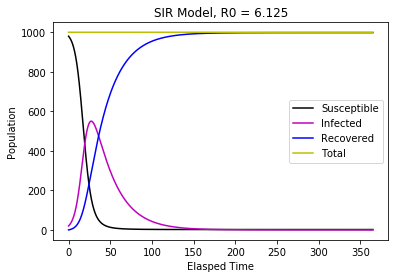

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd


# time step (days)
dt = 0.01 
# constant of proportionality (betaprime = beta*N)
betaprime = 0.25 #*** I changed this from 0.025 to 0.25, so that we are consistent ***
# length of infective period
alpha = 0.04
# total run time
tottime = 365


# total population size
N = 1000
# inital percent removed
pr = 0
# initial percent infected
pi = 0.02
# inital percent susceptible
ps = 1 - pr - pi
# re-susceptibility
f = 0


niter = int(math.ceil(tottime/dt))
t = np.arange(0, tottime, dt)   
S = np.zeros(niter)
I = np.zeros(niter)
R = np.zeros(niter)

S[0] = ps*N
I[0] = pi*N
R[0] = pr*N

beta = betaprime/N


R0 = beta*S[0]/alpha
print(R0)


for j in range(niter-1):
    dSdt = -beta*S[j]*I[j] + f*alpha*I[j]
    dIdt = beta*S[j]*I[j] - alpha*I[j]
    dRdt = ( 1 - f)*alpha*I[j]
    S[j+1] = S[j] + dt*dSdt
    I[j+1] = I[j] + dt*dIdt
    R[j+1] = R[j] + dt*dRdt
    
N = S + I + R


#plotname = "SIR_alpha0.04_beta'0.25.png"

plt.plot(t, S, 'k', label = 'Susceptible')
plt.plot(t, I, 'm', label = 'Infected')
plt.plot(t, R, 'b', label = 'Recovered') #*** I added a plot and label for recovered ***
plt.plot(t, N, 'y', label = 'Total')
plt.gca().legend(('Susceptible','Infected','Recovered','Total'))
plt.title('SIR Model, R0 = ' + str(R0.round(4)))
plt.xlabel('Elasped Time')
plt.ylabel('Population')
#plt.savefig(plotname)
plt.show()


#filename = "SIR_alpha04_beta'25.csv"
#df = pd.DataFrame({'Days':t, 'Infected':I, 'Susceptible':S,
#                   'Total':N})

#df.to_csv(filename)

### Functionalizing Joe's Code for my purposes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [10]:
@interact(alpha=(0,1,0.01), lmbda=(0,1,0.01), tottime=(100,10000,10), f=(0,1,0.01),
          N0=(0,100000,1000), pr=(0,1,0.0001), pi=(0,1,0.0001))
def SIS_model(alpha=0.04, lmbda=0.25, tottime=370, f=1, N0=10000, pr=0, pi=0.02):

    dt = 0.01 

    ps = 1 - pr - pi
    
    niter = int(math.ceil(tottime/dt))
    t = np.arange(0, tottime, dt)   
    S = np.zeros(niter)
    I = np.zeros(niter)
    
    S[0] = ps*N0
    I[0] = pi*N0

    R0 = lmbda/alpha
    
    for j in range(niter-1):
        dSdt = -lmbda/N0*S[j]*I[j] + f*alpha*I[j]
        dIdt = lmbda/N0*S[j]*I[j] - alpha*I[j]
        S[j+1] = S[j] + dt*dSdt
        I[j+1] = I[j] + dt*dIdt
    
    R = N0-S-I
    
    
    plt.plot(t, S, 'k', label = 'Susceptible')
    plt.plot(t, I, 'm', label = 'Infected')
    plt.plot(t, R, 'b', label = 'Recovered')
    plt.plot(t, S+I+R, 'y', label = 'Total')
    plt.gca().legend(('Susceptible','Infected','Recovered','Total'), loc= 'right')
    plt.title('Brauer 2008 SIS Model, R0 = ' + str(round(R0,4)))
    plt.xlabel('Days since ' + str(pi*100) + ' percent of population infected')
    plt.ylabel('Population')
    plt.show()
    
    return plt.show()

interactive(children=(FloatSlider(value=0.04, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.25…